## 准备数据



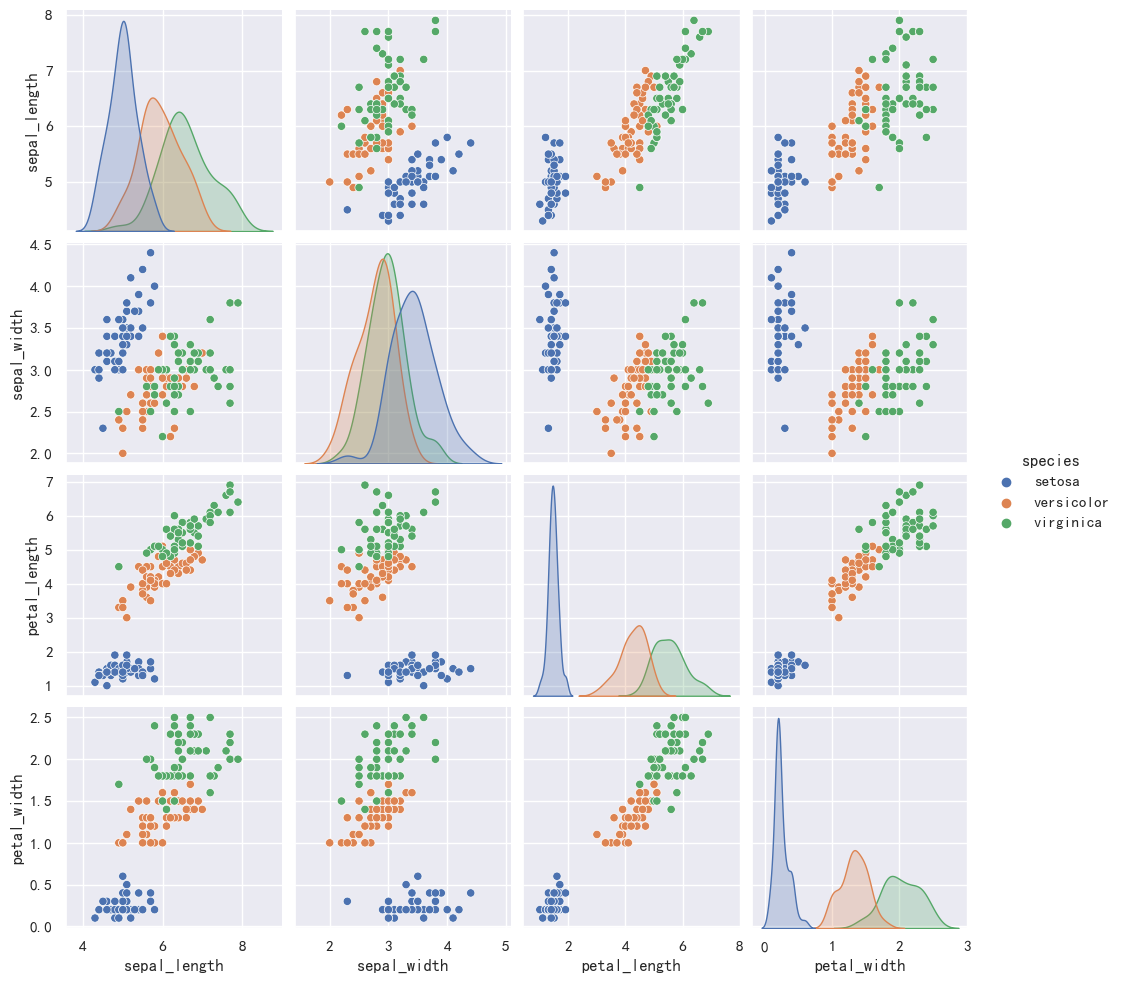

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species')


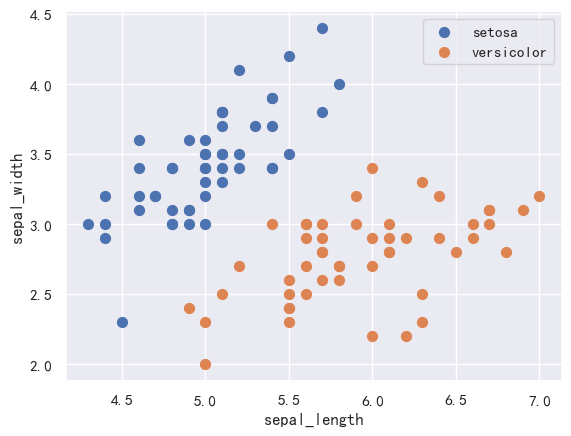

In [193]:
# 取出'sepal_length'，'sepal_width'和'species'，前100个数据，前50个'species'是'setosa'，后50个'species'是'versicolor'
data = np.array(iris.iloc[:100, [0, 1, -1]])
# 第一维度全部取出(100行)，第二维度取出第一个列，到倒数第二个列
X = data[:,:-1]
# 二分类'species'标签，'setosa'值为-1，'versicolor'值为1
y = np.array([1 if s == 'versicolor' else -1 for s in data[:,-1]])

fig, ax = plt.subplots()
sct = ax.scatter(X[:50, 0], X[:50, 1], s=50, label='setosa')
sct = ax.scatter(X[50:100, 0], X[50:100, 1], s=50, label='versicolor')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.legend()

## 训练模型


In [194]:
class MyPerceptron:
    def __init__(self):
        self.b = 0
        self.l_rate = 0.1

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        self.w = np.ones(len(X_train[0]), dtype=np.float32)
        is_end = False
        while not is_end:
            err_point_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    # 处理误分点d
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    err_point_count += 1
            if err_point_count == 0:
                is_end = True
        return f'Perceptron Model!'

perceptron = MyPerceptron()
perceptron.fit(X, y)

x_line = np.linspace(4, 7, 10)
a = -perceptron.w[0]/perceptron.w[1]
b = -perceptron.b/perceptron.w[1]
y_line = a*x_line + b

In [195]:
import sklearn
from sklearn.linear_model import Perceptron

# tol参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。如果设置成None可保证不会出现误差点
clf = Perceptron(fit_intercept=True, max_iter=1000, shuffle=True, tol=None)
clf.fit(X, y)

x_line_g = np.arange(4, 8)
a_g = -clf.coef_[0][0]/clf.coef_[0][1]
b_g = -clf.intercept_/clf.coef_[0][1]
y_line_g = a_g*x_line_g + b_g

对比`sklearn`的`Perceptron`模型和本地实现的`MyPerceptron`模型，结果如下：

Text(0.5, 1.0, 'skPerceptron')

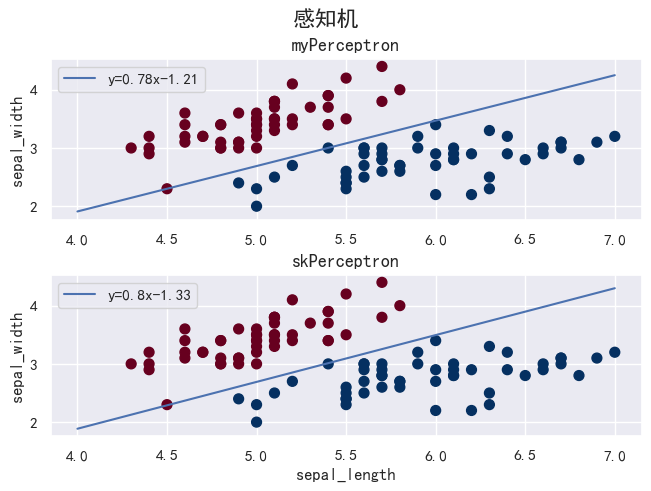

In [196]:
fig, ax = plt.subplots(2, 1, constrained_layout=True, sharey=True)
fig.suptitle('感知机', fontsize=16)

ax[0].scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='RdBu')

# 感知机线
ax[0].plot(x_line, y_line, label=f'y={round(a,2)}x{round(b,2)}')
ax[0].legend(loc='upper left')

ax[0].set_ylabel('sepal_width')
ax[0].set_title('myPerceptron', fontsize=13)

ax[1].scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='RdBu')
# 感知机线
ax[1].plot(x_line_g, y_line_g, label=f'y={round(a_g, 2)}x{round(b_g[0],2)}')
ax[1].legend(loc='upper left')

ax[1].set_xlabel('sepal_length')
ax[1].set_ylabel('sepal_width')
ax[1].set_title('skPerceptron', fontsize=13)